**Mathematical Foundations for Computer Vision and Machine Learning**

***Assignment11 - Image Denoising***

Name: Jinwoo Jeon

Student ID: 20143954


[Link to Github](https://github.com/zinuzian/assignment11)

# Setting Up

We should get ready to read mnist files. 

**Careful! It's really huge!** You should have enough free memory.

I made ```cau.jpg``` as **1/4** of the original image since it takes too much time.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure

file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

# Functions

Theres some funtions implemented below.

We find the derivative of 2-D image.

To implement by using Least Square Problem, we should find a new version that correspond to vectorized image...

Reconstruction Image is kind of regularization problem.

In [35]:
def derivative2d(row,col):
    v_len = row * col
    Dx = np.zeros((col,v_len))
    for i in range(col):
        Dx[i][i] = -1
        Dx[i][i+row] = 1

    Dy = np.zeros((v_len-col,v_len))
    for i in range(col):
        for j in range(row-1):
            Dy[(row-1)*i+j][row*i+j] = -1
            Dy[(row-1)*i+j][row*i+j+1] = 1

    return Dx,Dy

def reconstructionError(ori,rec,ratio,dx,dy):
    f=np.transpose(ori).flatten()
    x=np.transpose(rec).flatten()
    return np.sum((f-x)**2) +ratio*(np.sum(np.dot(dx,x)**2)+np.sum(np.dot(dy,x)**2))

# For Real World Image

The noise always exists. Let's say the the noise follows **Normal Distribution** with different sigmas.

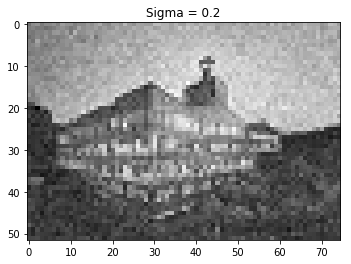

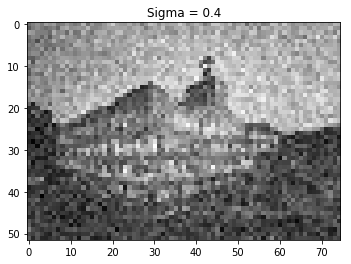

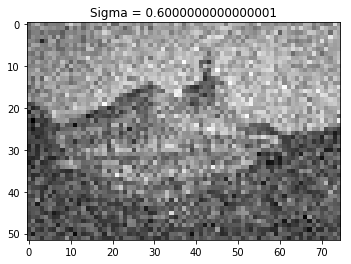

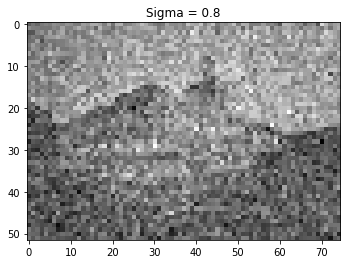

In [36]:
# Generate Noised Image
input_im = np.zeros((4,row,col))
cnt=0
sigmas = np.arange(0.2,1.0,0.2)
for sigma in sigmas:
    noise = np.random.normal(0, sigma, (row, col))
    im_noise = im + noise
    input_im[cnt] = im_noise
    cnt+=1
    
    
for i in range(len(input_im)):
    plt.imshow(input_im[i],cmap="gray")
    plt.title("Sigma = " + str(sigmas[i]))
    plt.show()

# Application to Least Square

We first need to vectorize the input data.

In [37]:
dudx ,dudy = derivative2d(row,col)
v = np.transpose(input_im[0]).flatten()

print(dudx)
print(dudy)


[[-1.  0.  0. ...  0.  0.  0.]
 [ 0. -1.  0. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[-1.  1.  0. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 [ 0.  0. -1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0.  0. ... -1.  1.  0.]
 [ 0.  0.  0. ...  0. -1.  1.]]


# Solving Regularization Problem 

Regularization Eqation looks like this.

$$ \varepsilon(u,\lambda) = \|u-f\|^{2} + \lambda\|\nabla{u}\|^{2} $$


And the equation can be rewritten like...

$$ \varepsilon(u,\lambda) = \|\begin{pmatrix}I\\ \sqrt{\lambda}Dx\\\sqrt{\lambda}Dy\end{pmatrix}u-\begin{pmatrix}f\\0\\0\end{pmatrix}\|^{2}$$

This looks very similar to **Least Square Problem**.
$$ \varepsilon(u,\lambda) = \|Au-b\|^{2} $$


The **Reconstruction Error** is shown above the each picture.

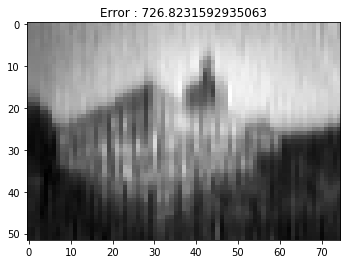

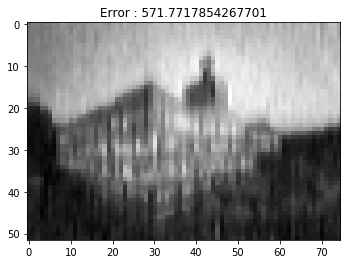

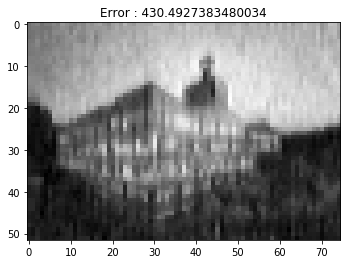

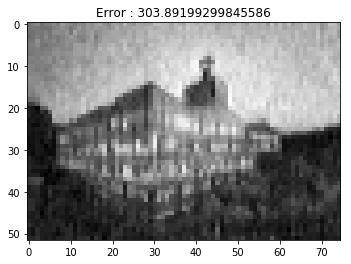

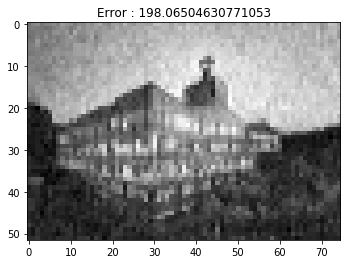

In [38]:
cnt=1
ratio = [4,2,1,0.5, 0.25,]

recErr = []

for r in ratio:
    # Au = b
    plt.figure()
    A = np.identity(len(v))
    dx = np.sqrt(r) * dudx
    dy = np.sqrt(r)*dudy

    A= np.append(A,dx, axis=0)
    A= np.append(A,dy, axis=0)

    b=np.append(v,np.zeros(len(dx)))
    b = np.append(b, np.zeros(len(dy)))

    u = np.dot(np.linalg.pinv(A),b)
    u=np.transpose(np.reshape(u,(col,row)))
    err = reconstructionError(input_im[0],u,r,dudx,dudy)
    recErr.append(err)
    plt.imshow(u,cmap="gray")
    plt.title("Error : " + str(err))
    cnt+=1

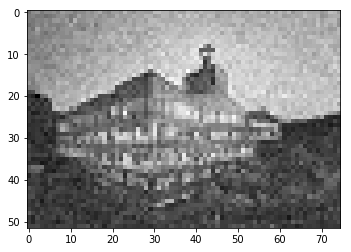

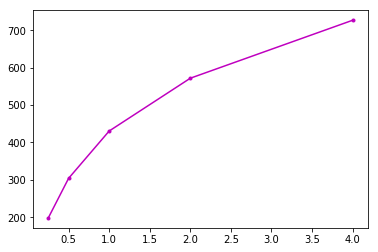

In [44]:
plt.imshow(input_im[0],cmap="gray")
plt.show()
plt.plot(ratio,recErr,"m.-")
plt.show()


# Futher Test

We can see that as ratio of regularization term decreases, the reconstruction error goes down.


```input_im``` array hold various noised images. So we can test it just changing the index of ```input_im[0]``` 0 to other in the code.